## import libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('food.csv')
df = pd.read_csv('food.csv')

## EDA

In [3]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
data.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
234,25,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
31,22,Male,Single,Student,No Income,Post Graduate,4,12.9783,77.6408,560038,Yes,Positive,Yes
333,29,Male,Married,Employee,25001 to 50000,Graduate,4,12.9261,77.6221,560034,No,Negative,No
182,22,Female,Single,Employee,25001 to 50000,Graduate,4,12.9698,77.7500,560066,Yes,Positive,Yes
294,25,Female,Prefer not to say,Employee,25001 to 50000,Post Graduate,3,12.9980,77.6227,560005,No,Negative,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [6]:
data.columns = data.columns.str.replace(' ', '_')

In [7]:
data.isna().sum()

Age                           0
Gender                        0
Marital_Status                0
Occupation                    0
Monthly_Income                0
Educational_Qualifications    0
Family_size                   0
latitude                      0
longitude                     0
Pin_code                      0
Output                        0
Feedback                      0
Unnamed:_12                   0
dtype: int64

In [8]:
data.describe()

,Age,Family_size,latitude,longitude,Pin_code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [9]:
data.describe(include = object)

,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Output,Feedback,Unnamed:_12
count,388,388,388,388,388,388,388,388
unique,2,3,4,5,5,2,2,2
top,Male,Single,Student,No Income,Graduate,Yes,Positive,Yes
freq,222,268,207,187,177,301,317,301


## Sütunları inceleyelim

In [10]:
data.columns

Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'latitude', 'longitude',
       'Pin_code', 'Output', 'Feedback', 'Unnamed:_12'],
      dtype='object')

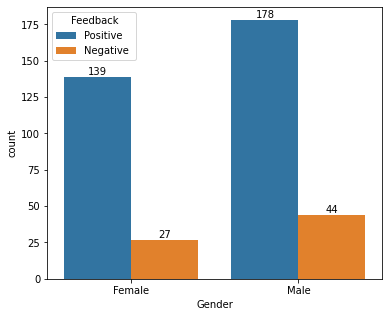

In [11]:
plt.figure(figsize = (6, 5))
ax = sbn.countplot(data.Gender, hue = data.Feedback)
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);

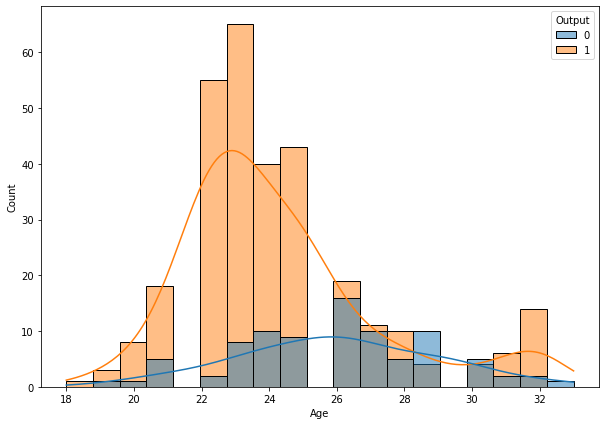

In [75]:
plt.figure(figsize = (10,7))
sbn.histplot(x = 'Age', hue = 'Output', data = data, kde = True, color = 'red');
plt.show()

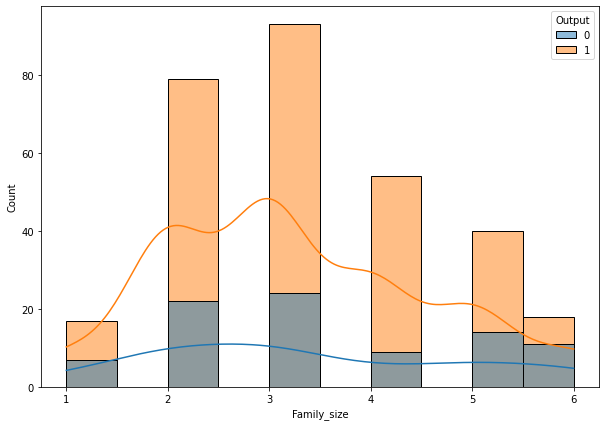

In [76]:
plt.figure(figsize = (10,7))
sbn.histplot(x = 'Family_size', hue = 'Output', data = data, kde = True, color = 'green');
plt.show()

### object olmaması gerekenleri numerik değerlere dondurelim.

In [14]:
data.sample(5)

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,Output,Feedback,Unnamed:_12
77,21,Male,Single,Student,No Income,Graduate,4,12.9770,77.5773,560009,Yes,Positive,Yes
52,24,Male,Single,Student,No Income,Post Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
32,25,Male,Married,Employee,More than 50000,Ph.D,4,12.9261,77.6221,560034,Yes,Positive,Yes
301,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
121,26,Male,Single,Self Employeed,25001 to 50000,Graduate,3,12.9766,77.5993,560001,Yes,Positive,Yes


In [15]:
d1 = {'Prefer not to say' : 0, 'Married' : 1, 'Single' : 2}
data.Marital_Status = data.Marital_Status.map(d1)
data.Marital_Status.value_counts()

2    268
1    108
0     12
Name: Marital_Status, dtype: int64

In [16]:
d2 = {'House wife' : 0, 'Self Employeed' : 1, 'Employee' : 2, 'Student' : 3}
data.Occupation = data.Occupation.map(d2)
data.Occupation.value_counts()

3    207
2    118
1     54
0      9
Name: Occupation, dtype: int64

In [17]:
d3 = {'No Income' : 0, '25001 to 50000' : 37500, 'More than 50000' : 50000, '10001 to 25000' : 17500,
     'Below Rs.10000' : 5000}
data.Monthly_Income = data.Monthly_Income.map(d3)
data.Monthly_Income.value_counts()

0        187
37500     69
50000     62
17500     45
5000      25
Name: Monthly_Income, dtype: int64

In [18]:
d5 = {'Uneducated' : 0, 'School' : 1, 'Graduate' : 2, 'Post Graduate' : 3, 'Ph.D' : 4}
data.Educational_Qualifications = data.Educational_Qualifications.map(d5)
data.Educational_Qualifications.value_counts()

2    177
3    174
4     23
1     12
0      2
Name: Educational_Qualifications, dtype: int64

In [19]:
data.Feedback = data.Feedback.str.replace(' ', '')
d6 = {'Positive' : 1, 'Negative' : 0}
data.Feedback = data.Feedback.map(d6)
data.Feedback.value_counts()

1    317
0     71
Name: Feedback, dtype: int64

In [20]:
d7 = {'Yes' : 1, 'No' : 0}
data.Output = data.Output.map(d7)
data.Output.value_counts()

1    301
0     87
Name: Output, dtype: int64

In [22]:
data = data.drop(['Pin_code', 'Unnamed:_12'], axis = 1)

In [23]:
data.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Output,Feedback
0,20,Female,2,3,0,3,4,12.9766,77.5993,1,1
1,24,Female,2,3,5000,2,3,12.9770,77.5773,1,1
2,22,Male,2,3,5000,3,3,12.9551,77.6593,1,0
3,22,Female,2,3,0,2,6,12.9473,77.5616,1,1
4,22,Male,2,3,5000,3,4,12.9850,77.5533,1,1


In [24]:
x = data.drop('Output', axis = 1)
y = data['Output']

In [25]:
x = pd.get_dummies(x, drop_first = True)
x.shape, y.shape

((388, 10), (388,))

## Makine Öğrenimi Modeli

In [44]:
def classification(x, y):
    model1 = LogisticRegression()
    model2 = DecisionTreeClassifier()
    model3 = RandomForestClassifier()
    model4 = BernoulliNB()
    model5= GaussianNB()
    model6 = SVC()
    model7 = GradientBoostingClassifier()
    model8 = AdaBoostClassifier()
    model9 = HistGradientBoostingClassifier()
    model10 = BaggingClassifier()
    model11 = XGBClassifier()
    model12 = ExtraTreesClassifier()
    model13 = ExtraTreeClassifier()
    
    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13]
    model_names = ['Logistic', 'Decision', 'Random', 'Bernoulli', 'Gaussian', 'Support', 'Gradient',
                  'AdaBoost', 'Hist', 'Bagging', 'XGBoost', 'ExtraTrees', 'ExtraTree']
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    #x_train = StandardScaler().fit_transform(x_train)
    #x_test = StandardScaler().fit_transform(x_test)
    
    acc = []
    f1 = []
    skor = pd.DataFrame(columns = ['Accuracy', 'F1_Score'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred) * 100)
        f1.append(f1_score(y_true, y_pred) * 100)
        
    skor['Accuracy'] = acc
    skor['F1_Score'] = f1
    
    return skor.sort_values('Accuracy', ascending = False)

In [45]:
classification(x, y)

,Accuracy,F1_Score
Random,89.743590,94.029851
Decision,88.461538,93.129771
Hist,88.461538,93.129771
XGBoost,88.461538,93.129771
ExtraTrees,88.461538,93.129771
Gaussian,87.179487,92.537313
Gradient,87.179487,92.424242
AdaBoost,87.179487,92.537313
Bagging,87.179487,92.307692
Bernoulli,85.897436,91.729323


In [ ]:
## Şimdi korelasyonu dusuk sutunları kaldırıp deneyelim.

In [48]:
data.corr()['Output'].sort_values(ascending = False)

Output                        1.000000
Feedback                      0.592609
Marital_Status                0.281810
Occupation                    0.240721
Educational_Qualifications    0.079595
longitude                     0.045265
Family_size                  -0.043780
latitude                     -0.159963
Monthly_Income               -0.213938
Age                          -0.248052
Name: Output, dtype: float64

In [49]:
x1 = x.drop(['Educational_Qualifications', 'longitude', 'Family_size', 'latitude'], axis = 1)

In [50]:
classification(x1, y)   ## sonuc çok değişmedi.

,Accuracy,F1_Score
Gaussian,88.461538,93.333333
Gradient,88.461538,93.233083
XGBoost,88.461538,93.233083
ExtraTrees,88.461538,93.233083
Random,87.179487,92.537313
Hist,87.179487,92.537313
Decision,85.897436,91.472868
Bernoulli,85.897436,91.729323
Bagging,85.897436,91.729323
Logistic,84.615385,91.666667


## Derin Öğrenme Modeli

In [64]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [65]:
model = Sequential()
model.add(Dense(units = 124, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy') 

In [66]:
early = EarlyStopping(monitor = 'accuracy', patience = 20, mode = 'max')

In [67]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_true), epochs = 200, batch_size = 32, verbose = 1, callbacks = [early])

Epoch 1/200
10/10 [==============================] - 2s 27ms/step - loss: 0.5969 - accuracy: 0.7581 - val_loss: 0.3934 - val_accuracy: 0.8462
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 0.4214 - accuracy: 0.7581 - val_loss: 0.3286 - val_accuracy: 0.8462
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.3901 - accuracy: 0.7581 - val_loss: 0.3725 - val_accuracy: 0.8462
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3613 - accuracy: 0.7903 - val_loss: 0.3438 - val_accuracy: 0.8462
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3191 - accuracy: 0.8903 - val_loss: 0.3433 - val_accuracy: 0.8333
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 0.2762 - accuracy: 0.8935 - val_loss: 0.3432 - val_accuracy: 0.8333
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 0.2501 - accuracy: 0.9097 - val_loss: 0.3672 - val_accuracy: 0.8205
Epoch 8/200

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 124)               1364      
                                                                 
 dense_39 (Dense)            (None, 512)               64000     
                                                                 
 dense_40 (Dense)            (None, 512)               262656    
                                                                 
 dense_41 (Dense)            (None, 512)               262656    
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 32)                8224      
                                                                 
 dense_44 (Dense)            (None, 16)               

In [69]:
model.evaluate(x_train, y_train)

10/10 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.9968


[0.00552775152027607, 0.9967741966247559]

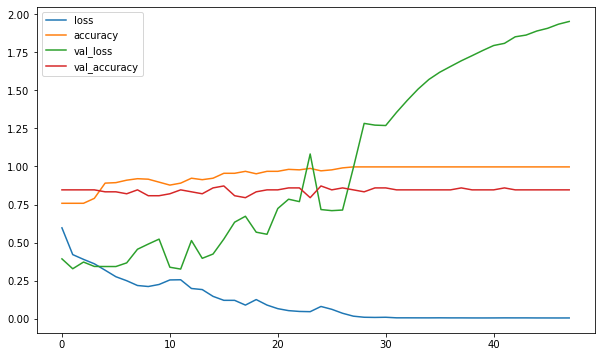

In [74]:
loss = pd.DataFrame(history.history)
fig, ax = plt.subplots(figsize=(10, 6))
loss.plot(ax=ax)
plt.show()